In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.signal import savgol_filter

In [2]:
ds_depth_2022 = Dataset("/Users/hritik/Documents/Project /Wave-Prediction/dAtA/Sea_surface/gebco_2022_n40.5_s38.5_w-11.0_e-8.5.nc")
all_ds = Dataset("/Users/hritik/Documents/Project /Wave-Prediction/dAtA/cmems_mod_ibi_wav_anfc_0.027deg_PT1H-i_multi-vars_11.00W-8.53W_38.50N-40.97N_2022-12-01-2025-01-01.nc")
# ds = Dataset("/Users/hritik/Documents/Project /Wave-Prediction/dAtA/GEBCO_01_Jul_2025_98b060c8070a/gebco_2019_tid_n40.5_s38.5_w-11.0_e-8.5.nc")

In [4]:
all_ds["VCMX"].shape

(18289, 90, 90)

In [3]:
all_ds.variables.keys()

dict_keys(['VCMX', 'VHM0', 'VHM0_SW1', 'VHM0_SW2', 'VHM0_WW', 'VMDR', 'VMDR_SW1', 'VMDR_SW2', 'VMDR_WW', 'VMXL', 'VPED', 'VSDX', 'VSDY', 'VTM01_SW1', 'VTM01_SW2', 'VTM01_WW', 'VTM02', 'VTM10', 'VTPK', 'latitude', 'longitude', 'time'])

In [28]:
# copernicusmarine subset -i cmems_mod_ibi_wav_anfc_0.027deg_PT1H-i -t 2022-12-01 -T 2025-01-01 -y 38.5 -Y 41.0 -x -11.0 -X -8.5

# VCMX        — Maximum crest trough wave height (Hc,max)  
# VHM0        — Spectral significant wave height (Hm0)  
# VHM0_SW1    — Spectral significant primary swell wave height  
# VHM0_SW2    — Spectral significant secondary swell wave height  
# VHM0_WW     — Spectral significant wind wave height  
# VMDR        — Mean wave direction from (Mdir)  
# VMDR_SW1    — Mean primary swell wave direction from  
# VMDR_SW2    — Mean secondary swell wave direction from  
# VMDR_WW     — Mean wind wave direction from  
# VMXL        — Height of the highest crest  
# VPED        — Wave principal direction at spectral peak  
# VSDX        — Stokes drift U  
# VSDY        — Stokes drift V  
# VTM01_SW1   — Spectral moments (0,1) primary swell wave period  
# VTM01_SW2   — Spectral moments (0,1) secondary swell wave period  
# VTM01_WW    — Spectral moments (0,1) wind wave period  
# VTM02       — Spectral moments (0,2) wave period (Tm02)  
# VTM10       — Spectral moments (-1,0) wave period (Tm-10)  
# VTPK        — Wave period at spectral peak / peak period (Tp)  

# latitude    — Latitude  
# longitude   — Longitude  
# time        — 24×((15×31)+(8×30)+(2×28)) + 24 + 1 = 18289

In [5]:
sz = 4000

time = all_ds.variables['time'][:sz]              # shape: (ntime,)
lat = all_ds.variables['latitude'][:sz]           # shape: (nlat,)
lon = all_ds.variables['longitude'][:sz]          # shape: (nlon,)

# Create a meshgrid of coordinates
time_grid, lat_grid, lon_grid = np.meshgrid(time, lat, lon, indexing='ij')
var_names = [
    'VCMX', 'VHM0', 'VHM0_SW1', 'VHM0_SW2', 'VHM0_WW',
    'VMDR', 'VMDR_SW1', 'VMDR_SW2', 'VMDR_WW',
    'VMXL', 'VPED', 'VSDX', 'VSDY',
    'VTM01_SW1', 'VTM01_SW2', 'VTM01_WW',
    'VTM02', 'VTM10', 'VTPK'
]

data = {}
for var in var_names:
    print(f'Loading {var}...')
    arr = all_ds.variables[var][:sz]              # shape: (time, lat, lon) 
    data[var] = arr.ravel()                     # flatten to 1D

# Build the DataFrame
df = pd.DataFrame({
    'time': time_grid.ravel(),
    'latitude': lat_grid.ravel(),
    'longitude': lon_grid.ravel(),
    **data
})

# print(df.head())
# print(df.info())

Loading VCMX...
Loading VHM0...
Loading VHM0_SW1...
Loading VHM0_SW2...
Loading VHM0_WW...
Loading VMDR...
Loading VMDR_SW1...
Loading VMDR_SW2...
Loading VMDR_WW...
Loading VMXL...
Loading VPED...
Loading VSDX...
Loading VSDY...
Loading VTM01_SW1...
Loading VTM01_SW2...
Loading VTM01_WW...
Loading VTM02...
Loading VTM10...
Loading VTPK...


In [6]:
df.groupby("time").head()

,time,latitude,longitude,VCMX,VHM0,VHM0_SW1,VHM0_SW2,VHM0_WW,VMDR,VMDR_SW1,...,VMXL,VPED,VSDX,VSDY,VTM01_SW1,VTM01_SW2,VTM01_WW,VTM02,VTM10,VTPK
0,639168.0,38.500385,-10.999755,5.97,3.22,3.12,0.09,0.77,291.769998,288.939998,...,3.74,284.999998,0.06,-0.09,10.08,5.18,3.47,7.74,11.08,14.44
1,639168.0,38.500385,-10.971976,5.96,3.21,3.12,0.08,0.74,291.719998,289.059998,...,3.73,284.999998,0.06,-0.09,10.06,5.14,3.41,7.76,11.10,14.44
2,639168.0,38.500385,-10.944198,5.95,3.21,3.12,0.08,0.73,291.669998,289.099998,...,3.73,284.999998,0.06,-0.08,10.05,5.14,3.38,7.77,11.11,14.44
3,639168.0,38.500385,-10.916419,5.94,3.20,3.12,0.09,0.71,291.619998,289.119998,...,3.72,284.999998,0.06,-0.08,10.05,5.14,3.36,7.79,11.13,14.45
4,639168.0,38.500385,-10.888640,5.93,3.20,3.12,0.12,0.68,291.559998,289.199998,...,3.72,284.999998,0.06,-0.08,10.03,5.11,3.29,7.80,11.14,14.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32391900,643167.0,38.500385,-10.999755,5.09,2.67,0.51,0.34,2.49,355.739996,318.389997,...,3.21,354.999996,0.00,-0.15,11.00,9.10,6.07,5.76,7.07,8.09
32391901,643167.0,38.500385,-10.971976,5.07,2.66,0.51,0.34,2.48,355.609996,318.459997,...,3.20,354.999996,0.01,-0.15,10.99,9.10,6.07,5.75,7.07,8.10
32391902,643167.0,38.500385,-10.944198,5.05,2.65,0.51,0.34,2.46,355.449996,318.509997,...,3.19,354.999996,0.01,-0.15,10.99,9.10,6.06,5.74,7.07,8.11
32391903,643167.0,38.500385,-10.916419,5.01,2.64,0.51,0.34,2.44,355.289996,318.549997,...,3.17,354.999996,0.01,-0.15,10.99,9.10,6.04,5.73,7.07,8.13


In [7]:
# Apply Savitzky-Golay filter to each column
window_length = 51  # Must be odd
polyorder = 3       # Degree of polynomial
df_smooth = df.copy()
for var in var_names:
    df_smooth[var] = savgol_filter(df[var], window_length=window_length, polyorder=polyorder)

In [10]:
df_smooth.head()

,time,latitude,longitude,VCMX,VHM0,VHM0_SW1,VHM0_SW2,VHM0_WW,VMDR,VMDR_SW1,...,VMXL,VPED,VSDX,VSDY,VTM01_SW1,VTM01_SW2,VTM01_WW,VTM02,VTM10,VTPK
0,639168.0,38.500385,-10.999755,5.969790,3.218881,3.119371,0.081538,0.770280,291.770837,288.946921,...,3.737832,284.999998,0.06,-0.091259,10.080140,5.165315,3.468601,7.740419,11.080699,14.438181
1,639168.0,38.500385,-10.971976,5.960350,3.212867,3.120210,0.087343,0.745944,291.723284,289.024683,...,3.733916,284.999998,0.06,-0.086224,10.064335,5.190350,3.424056,7.757203,11.096503,14.441049
2,639168.0,38.500385,-10.944198,5.950233,3.207273,3.120676,0.091958,0.722704,291.669018,289.103867,...,3.728671,284.999998,0.06,-0.082797,10.049534,5.153753,3.376433,7.773566,11.113030,14.444195
3,639168.0,38.500385,-10.916419,5.939813,3.202109,3.120746,0.095385,0.701119,291.610324,289.179601,...,3.722517,284.999998,0.06,-0.080699,10.036468,5.072809,3.328380,7.789091,11.129837,14.447610
4,639168.0,38.500385,-10.888640,5.929464,3.197389,3.120396,0.097622,0.681748,291.549485,289.247014,...,3.715874,284.999998,0.06,-0.079650,10.025874,4.964802,3.282541,7.803356,11.146480,14.451282


<Axes: >

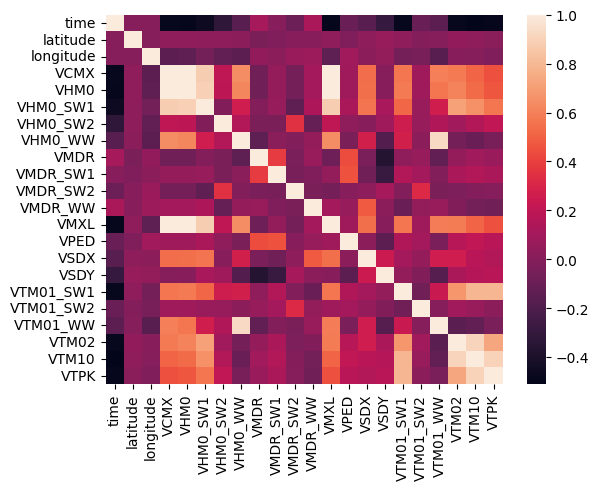

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

In [48]:
# import plotly.express as px

# subset = df[df['time'] == df['time'].iloc[0]]  # First time step
# fig = px.scatter_geo(subset, lat='latitude', lon='longitude', color='wave_height',
#                      title='Wave height at first timestep')
# fig.show()

<Axes: title={'center': 'Mean wave height over time'}, xlabel='time'>

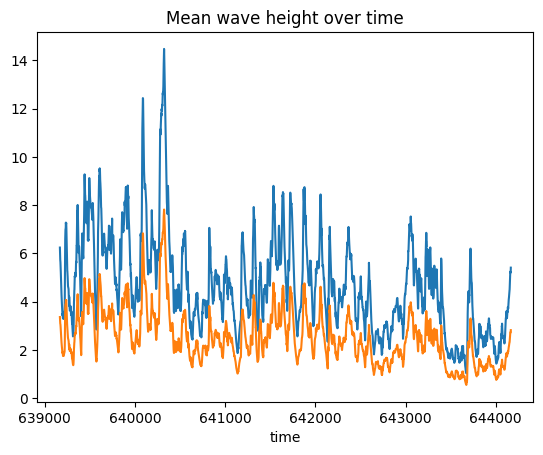

In [17]:
df_smooth.groupby('time')['VCMX'].max().plot(title='Max wave height over time')
df_smooth.groupby('time')['VHM0'].max().plot(title='Mean wave height over time')

<Axes: title={'center': 'Mean wave height over time'}, xlabel='time'>

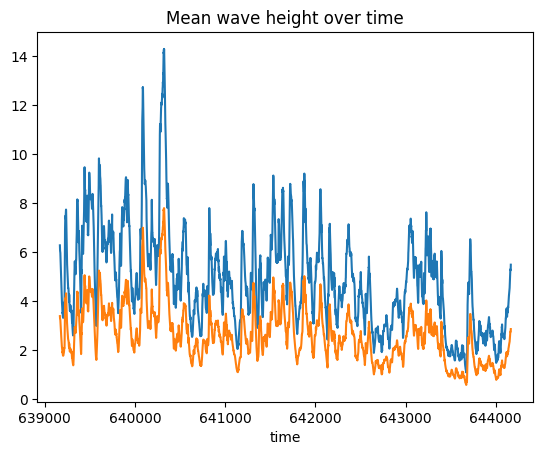

In [12]:
df.groupby('time')['VCMX'].max().plot(title='Max wave height over time')
df.groupby('time')['VHM0'].max().plot(title='Mean wave height over time')

In [8]:
from sklearn.model_selection import train_test_split

target_var = 'VCMX'

X = df_smooth.drop(columns=[target_var])  
y = df_smooth[target_var]                

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    shuffle=False  # Important for time series!
)


print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

: 

# Depth Analysys

In [7]:
ds_depth_2022.variables.keys()

dict_keys(['lat', 'lon', 'elevation'])

In [8]:
ds_depth_2022.variables['elevation'].shape

(480, 600)

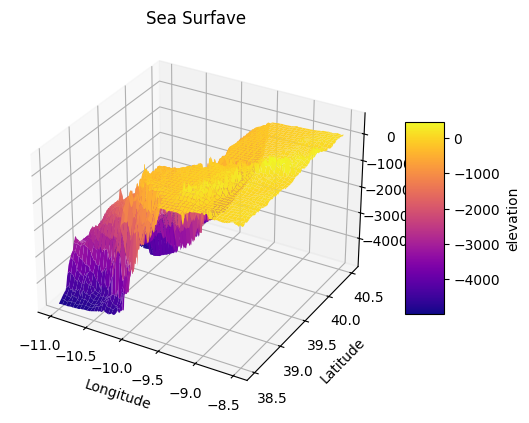

In [50]:
lat = ds_depth_2022.variables['lat'][:]
lon = ds_depth_2022.variables['lon'][:]
elev = ds_depth_2022.variables['elevation'][:] 

# Create meshgrid for lat and lon
Lon, Lat = np.meshgrid(lon, lat)

# Plot
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

# 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Blues'
surf = ax.plot_surface(Lon, Lat, elev, cmap='plasma', edgecolor='none')

# ax.view_init(roll=0, azim=0)  # Adjust the view angle as needed
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth (m)')
ax.set_title(f'Sea Surfave')
fig.colorbar(surf, shrink=0.5, aspect=5, label='elevation')

plt.show()

In [16]:
import plotly.graph_objects as go
# 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Blues', 'Pinkyl'
fig = plt.figure(figsize=(18, 15))
fig = go.Figure(
    data=go.Surface(z=elev, x=lon, y=lat, colorscale='BuGn')
)
fig.update_layout(title='Sea Surface', autosize=True, width=1200 , height = 1000 )

fig.show()

<Figure size 1800x1500 with 0 Axes>

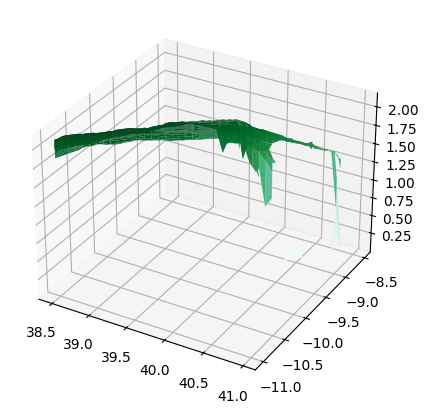

In [21]:
from mpl_toolkits.mplot3d import axis3d

fig = plt.figure(figsize=(6,5))
ax=fig.add_subplot(111, projection='3d')

# ax.view_init(roll=0, azim=0)

lat1=all_ds.variables["latitude"][:]
lon1=all_ds.variables["longitude"][:]

surf = ax.plot_surface(lat1,lon1,all_ds.variables["VHM0"][100,:,:],cmap='BuGn',  edgecolor='none')


In [20]:
all_ds.variables["VHM0"][0,0,0]
print(np.min(all_ds.variables["VHM0"][:,:,:]))
print(np.max(all_ds.variables["VHM0"][:,:,:]))

0.0
10.37999976798892


In [40]:
# import plotly.graph_objects as go1

# Lon, Lat = np.meshgrid(lon1, lat1) 
# fig = plt.figure(figsize=(12, 5))
# fig=go1.Figure(
#     data = go1.Surface(x=lat1,y=lon1,z=all_ds.variables["VCMX"][100,:,:], colorscale='BuGn')
    
# )
# fig.update_layout(
#     title='Significant Wave Height',
#     scene=dict(
#         xaxis_title='Longitude',
#         yaxis_title='Latitude',
#         zaxis_title='VHM0 (m)'
#     ),
#     width = 1200,
#     height = 1000
# )
# fig.show()

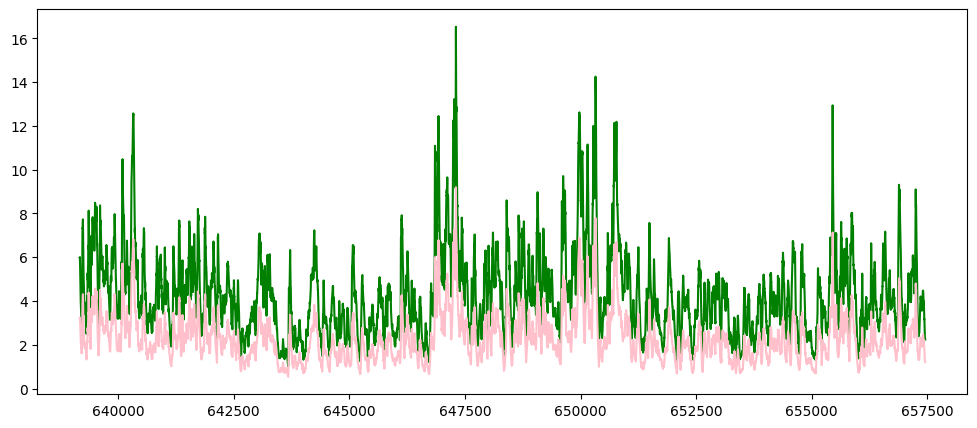

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(all_ds.variables["time"][:],all_ds.variables["VCMX"][:,0,0],color = "green")
plt.plot(all_ds.variables["time"][:],all_ds.variables["VHM0"][:,0,0],color = "pink")

copernicusmarine subset -i cmems_mod_ibi_wav_anfc_0.027deg_PT1H-i -t 2022-12-01 -T 2025-01-01 -y 38.5 -Y 41.0 -x -11.0 -X -8.5

Time : 24×((15×31)+(8×30)+(2×28)) + 24 + 1